In [1]:
from Agent import Agent
from Game import SnakeGameAI
from helper import plot
import pygame

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


<Figure size 432x288 with 0 Axes>

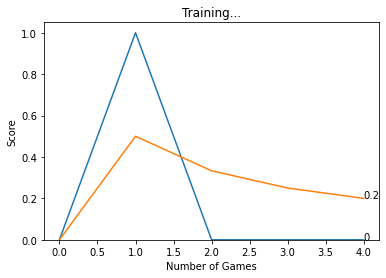

In [2]:
# using new obserations

plot_scores = []
plot_mean_scores = []
total_score = 0
record = 0
epsilons = []
game = SnakeGameAI()
agent = Agent(double_dqn=False, game=game)
# agent.load_model('model_v2.pth')

episode = 0
NUM_EPISODES = 5
while episode < NUM_EPISODES:
    state = agent.get_observation()
    action = agent.choose_action(state)
    reward, done, score = agent.game.play_step(action)
    new_state = agent.get_observation()
    # remember
    agent.remember(state, action, reward, new_state, done)
            
    if done:
        episode += 1
        # train long memory, plot result
        agent.game.reset()
        
        states, actions, rewards, new_states, dones = agent.get_memory_sample()
        agent.learn(states, actions, rewards, new_states, dones)

        if score > record:
            record = score
            agent.save_model('dqn_model_v0.pth')

        

        plot_scores.append(score)
        total_score += score
        mean_score = total_score / agent.number_episodes
        plot_mean_scores.append(mean_score)
        #print('Game', agent.n_games, 'Score', score, 'Record:', record, 'Mean Score: ', mean_score)
        plot(plot_scores,plot_mean_scores)
        

In [3]:
agent.save_model('dqn_model_v1.pth')

<Figure size 432x288 with 0 Axes>

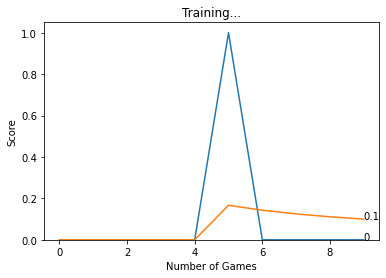

In [4]:
# using new obserations

plot_scores = []
plot_mean_scores = []
total_score = 0
record = 0
epsilons = []
game = SnakeGameAI()
agent_target = Agent(double_dqn=False, greedy=False, game=game)
agent_target.load_model('dqn_model_v1.pth')

episode = 0
NUM_EPISODES = 10

while episode < NUM_EPISODES:
    state = agent_target.get_observation()
    action = agent_target.choose_action(state)
    reward, done, score = agent_target.game.play_step(action)
    new_state = agent_target.get_observation()
    # remember
    agent_target.remember(state, action, reward, new_state, done)
            
    if done:
        episode += 1
        # train long memory, plot result
        agent_target.game.reset()
        
        states, actions, rewards, new_states, dones = agent_target.get_memory_sample()
        agent_target.learn(states, actions, rewards, new_states, dones)

        if score > record:
            record = score
            agent_target.save_model('dqn_model_v1.pth')

        

        plot_scores.append(score)
        total_score += score
        mean_score = total_score / agent_target.number_episodes
        plot_mean_scores.append(mean_score)
        #print('Game', agent_target.n_games, 'Score', score, 'Record:', record, 'Mean Score: ', mean_score)
        plot(plot_scores,plot_mean_scores)